In [1]:
import os, conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

In [2]:
grid =Dataset('grid.nc')

Lat = (grid.variables['lat'][:])
Lon = (grid.variables['lon'][:])

In [3]:
f =Dataset('AEP.nc')
AEP=np.fliplr(f.variables['AEP'][:])

In [4]:
def makeFig(complexity):
    plt.figure()
    
    fig = plt.figure()
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='kav7',lon_0=0,resolution='l')
    im1 = m.contourf(Lon,Lat,np.flipud(AEP[complexity]),np.arange(0, complexity+1, 1),
                     shading='flat',cmap=plt.cm.Spectral,latlon=True, extend='both')
    m.drawmapboundary(fill_color='0.9')
    m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[1,1,0,1])
    m.drawcoastlines()
    m.fillcontinents()
    cb = m.colorbar(im1,"bottom", size="5%", pad="9%")
    ax.set_title('AEP of complexity {:02d}'.format(complexity))
    #plt.savefig(saveName, format='png', dpi=500, bbox_inches='tight')
    plt.show()
    


/home/maike/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'shading'
  s)


<Figure size 432x288 with 0 Axes>

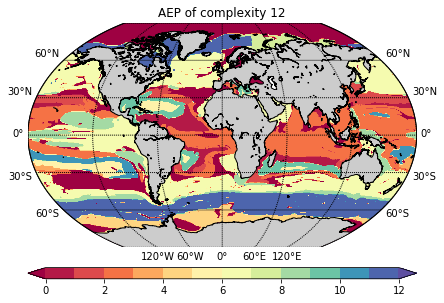

In [5]:
complexity = 12
makeFig(12)